In [3]:
from sklearn.cluster import KMeans
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_list=[]
image_path_list=glob('img/track*')
for image_path in image_path_list:
    image=cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
    image_list.append(image)

In [8]:
image_list[0].shape

(294, 190, 3)

--------------------------------------------------------
[22, 46, 168]


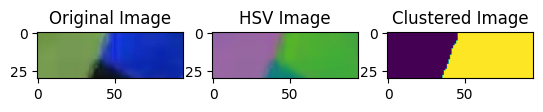

--------------------------------------------------------
[38, 75, 215]


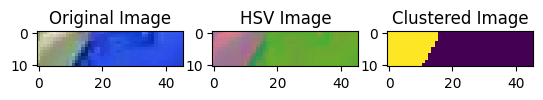

--------------------------------------------------------
[179, 47, 33]


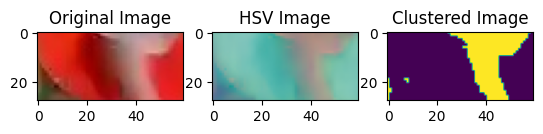

--------------------------------------------------------
[224, 69, 52]


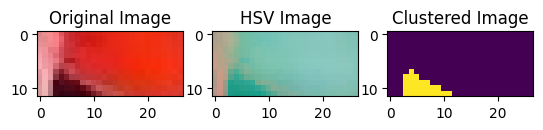

--------------------------------------------------------
[222, 54, 35]


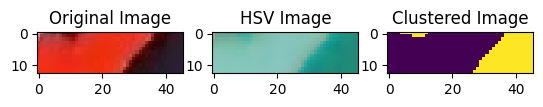

--------------------------------------------------------
[212, 52, 42]


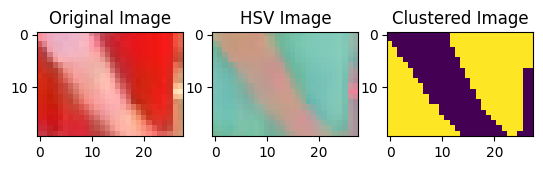

In [25]:
uniform_color_list=[]
for image in image_list:
    image_lab=cv2.cvtColor(image,cv2.COLOR_RGB2LAB)
    image_lab_top=image_lab[int(image_lab.shape[0]*(40/100)):int(image_lab.shape[0]*(50/100)),
                            int(image_lab.shape[1]*(25/100)):int(image_lab.shape[1]*(75/100))]
    kmeans_1=KMeans(n_clusters=2,init='k-means++',n_init=20,random_state=980219)
    kmeans_1.fit(image_lab_top.reshape(-1,3))
    clustered_img=kmeans_1.labels_.reshape(image_lab_top.shape[0],image_lab_top.shape[1])
    clusters=kmeans_1.labels_.tolist()
    uniform_cluster=max(clusters,key=clusters.count)
    uniform_color_lab=kmeans_1.cluster_centers_[uniform_cluster]
    uniform_color_rgb=[int(i) for i in cv2.cvtColor(np.array([[[i for i in uniform_color_lab]]],dtype=np.uint8),cv2.COLOR_Lab2RGB).tolist()[0][0]]
    uniform_color_list.append(uniform_color_lab)
    print('--------------------------------------------------------')
    print(uniform_color_rgb)
    fig=plt.figure()
    ax1=fig.add_subplot(1,3,1)
    ax2=fig.add_subplot(1,3,2)
    ax3=fig.add_subplot(1,3,3)
    ax1.set_title('Original Image')
    ax1.imshow(image[int(image.shape[0]*(40/100)):int(image.shape[0]*(50/100)),
                     int(image.shape[1]*(25/100)):int(image.shape[1]*(75/100))])
    ax2.set_title('HSV Image')
    ax2.imshow(image_lab_top)
    ax3.set_title('Clustered Image')
    ax3.imshow(clustered_img)
    plt.show()

In [26]:
kmeans_2=KMeans(n_clusters=2,init='k-means++',n_init=20,random_state=1030419)
kmeans_2.fit(uniform_color_list)
player_team_prediction={}
for idx,color in enumerate(uniform_color_list):
    team_id=kmeans_2.predict(np.array(color).reshape(1,-1))[0]
    track_id=idx+1
    player_team_prediction[track_id]={
        'team-id':team_id,
        'team-color':[int(i) for i in cv2.cvtColor(np.array([[[i for i in kmeans_2.cluster_centers_[team_id]]]],dtype=np.uint8),cv2.COLOR_Lab2RGB).tolist()[0][0]]
    }

In [27]:
player_team_prediction

{1: {'team-id': 0, 'team-color': [30, 60, 192]},
 2: {'team-id': 0, 'team-color': [30, 60, 192]},
 3: {'team-id': 1, 'team-color': [210, 56, 40]},
 4: {'team-id': 1, 'team-color': [210, 56, 40]},
 5: {'team-id': 1, 'team-color': [210, 56, 40]},
 6: {'team-id': 1, 'team-color': [210, 56, 40]}}

In [30]:
import pickle

In [33]:
with open('../track-stub/tracks-left-v8m-4(TA).pkl','rb') as siu:
    tracks=pickle.load(siu)

In [34]:
tracks['players'][0]

{1: {'bbox': [692.38232421875,
   265.90777587890625,
   882.990966796875,
   559.3394165039062],
  'team': 1,
  'team_color': [30, 60, 192]},
 2: {'bbox': [680.3274536132812,
   179.744873046875,
   772.7623901367188,
   294.6905517578125],
  'team': 1,
  'team_color': [30, 60, 192]},
 3: {'bbox': [440.79119873046875,
   253.5516357421875,
   561.2258911132812,
   533.614013671875],
  'team': 0,
  'team_color': [210, 56, 40]},
 4: {'bbox': [503.7855224609375,
   90.04074096679688,
   557.971435546875,
   213.44863891601562],
  'team': 0,
  'team_color': [210, 56, 40]},
 5: {'bbox': [859.043701171875,
   189.85037231445312,
   952.40380859375,
   311.8775939941406],
  'team': 0,
  'team_color': [210, 56, 40],
  'has_ball': True},
 6: {'bbox': [536.5278930664062,
   139.5489501953125,
   593.0401000976562,
   338.6937255859375],
  'team': 0,
  'team_color': [210, 56, 40]}}